# Baseball Case Study

# Problem Statement:

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#Importing Visualising Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes = True)
import missingno as msno

#Importing DataCleaning Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

#Importing Predictive Models 
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import statsmodels.formula.api as smf
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV

#Importing model evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

#Importing Lasso and Ridge for Regularization
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

import joblib

In [2]:
baseball = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")
baseball.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [3]:
baseball = baseball.rename(columns = {'W':"Wins", 'R':"Runs", 'AB' : "At_Bats",'H':"Hits",'2B':"Doubles",'3B':"Triples",'HR': "Homeruns",
                          'BB' :"Walks", 'SO': "Strikeouts", 'SB':"Stolen_Bases",'RA' : "Runs_Allowed", 'ER':"Earned_Runs",
                          'ERA':"Earned_Runs_Avg",'CG':"Complete_Games",'SHO':"Shutouts",'SV':"Saves",'E':"Errors"})
baseball.head()

,Wins,Runs,At_Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen_Bases,Runs_Allowed,Earned_Runs,Earned_Runs_Avg,Complete_Games,Shutouts,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


EDA

In [4]:
baseball.shape

(30, 17)

In [5]:
#Checking Datatypes of features and Null values
baseball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Wins             30 non-null     int64  
 1   Runs             30 non-null     int64  
 2   At_Bats          30 non-null     int64  
 3   Hits             30 non-null     int64  
 4   Doubles          30 non-null     int64  
 5   Triples          30 non-null     int64  
 6   Homeruns         30 non-null     int64  
 7   Walks            30 non-null     int64  
 8   Strikeouts       30 non-null     int64  
 9   Stolen_Bases     30 non-null     int64  
 10  Runs_Allowed     30 non-null     int64  
 11  Earned_Runs      30 non-null     int64  
 12  Earned_Runs_Avg  30 non-null     float64
 13  Complete_Games   30 non-null     int64  
 14  Shutouts         30 non-null     int64  
 15  Saves            30 non-null     int64  
 16  Errors           30 non-null     int64  
dtypes: float64(1), int

In [6]:
#Checking Null Values
baseball.isna().sum()

Wins               0
Runs               0
At_Bats            0
Hits               0
Doubles            0
Triples            0
Homeruns           0
Walks              0
Strikeouts         0
Stolen_Bases       0
Runs_Allowed       0
Earned_Runs        0
Earned_Runs_Avg    0
Complete_Games     0
Shutouts           0
Saves              0
Errors             0
dtype: int64

<AxesSubplot:>

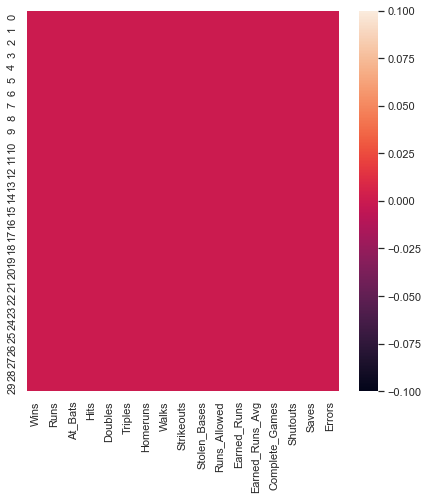

In [7]:
# heatmap to check the missing value
plt.figure(figsize = (7,7))
sns.heatmap(baseball.isna())

In [8]:
#Checking for Duplicated Records or fields
baseball.duplicated().sum()

0

In [9]:
#Statistical Overview of our Numerical Features
baseball.describe()

,Wins,Runs,At_Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen_Bases,Runs_Allowed,Earned_Runs,Earned_Runs_Avg,Complete_Games,Shutouts,Saves,Errors
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


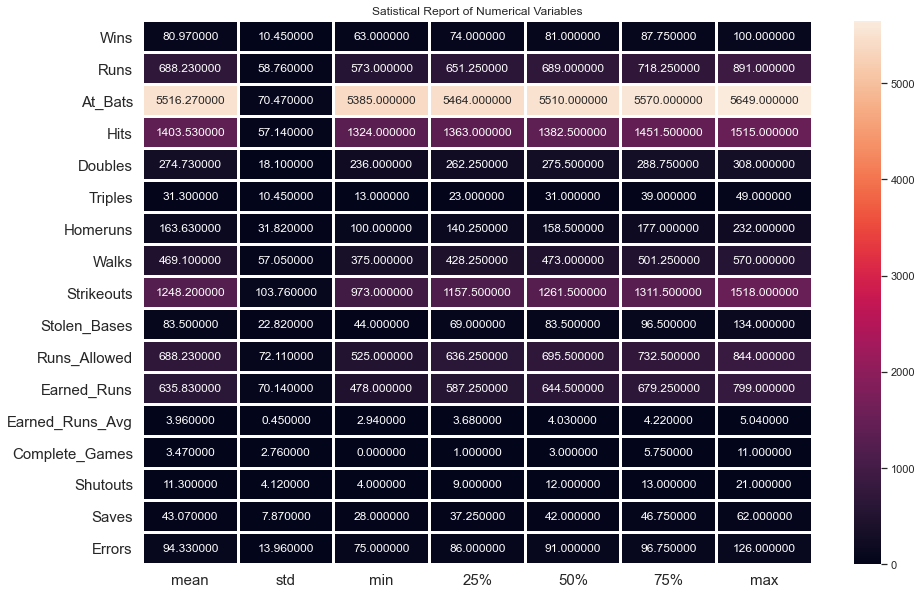

In [10]:
#visualizing statistical description of dataset
plt.figure(figsize = (15,10))
sns.heatmap(round(baseball.describe()[1:].transpose(),2),linewidth = 2,annot= True, fmt = "f")
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title("Satistical Report of Numerical Variables")
plt.show()

In [11]:
#Getting correlation matrix
correlation = baseball.corr()

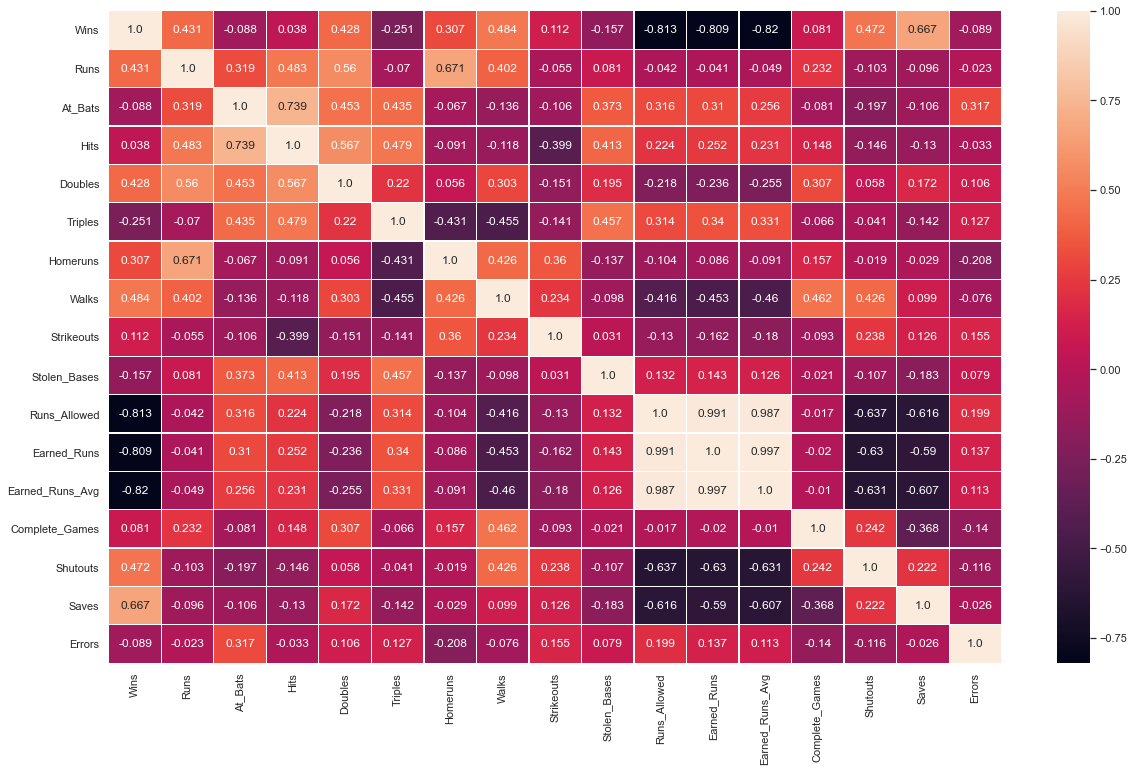

In [12]:
#Multivariate Analysis
#Checking Correlation among features
plt.figure(figsize = (20,12))
sns.heatmap(round(correlation,3), annot = True, linewidth = .2 , fmt = '1')
plt.show()

- Runs_Allowed, Earned_Runs and Earned_Runs_Avg have high negative correlation with Wins.
- At_Bats have high positive correlation with Hits.
- HomeRuns and Runs have high positive correlation.
- Saves and Wins have high positive correlation.
- Saves and Runs_allowed, Earned_Runs_Average have moderately high positive correlation.
- Shutouts have moderatey high positive correlation with Runs_Allowed, Earned_Runs and Earned_Runs_Avg.

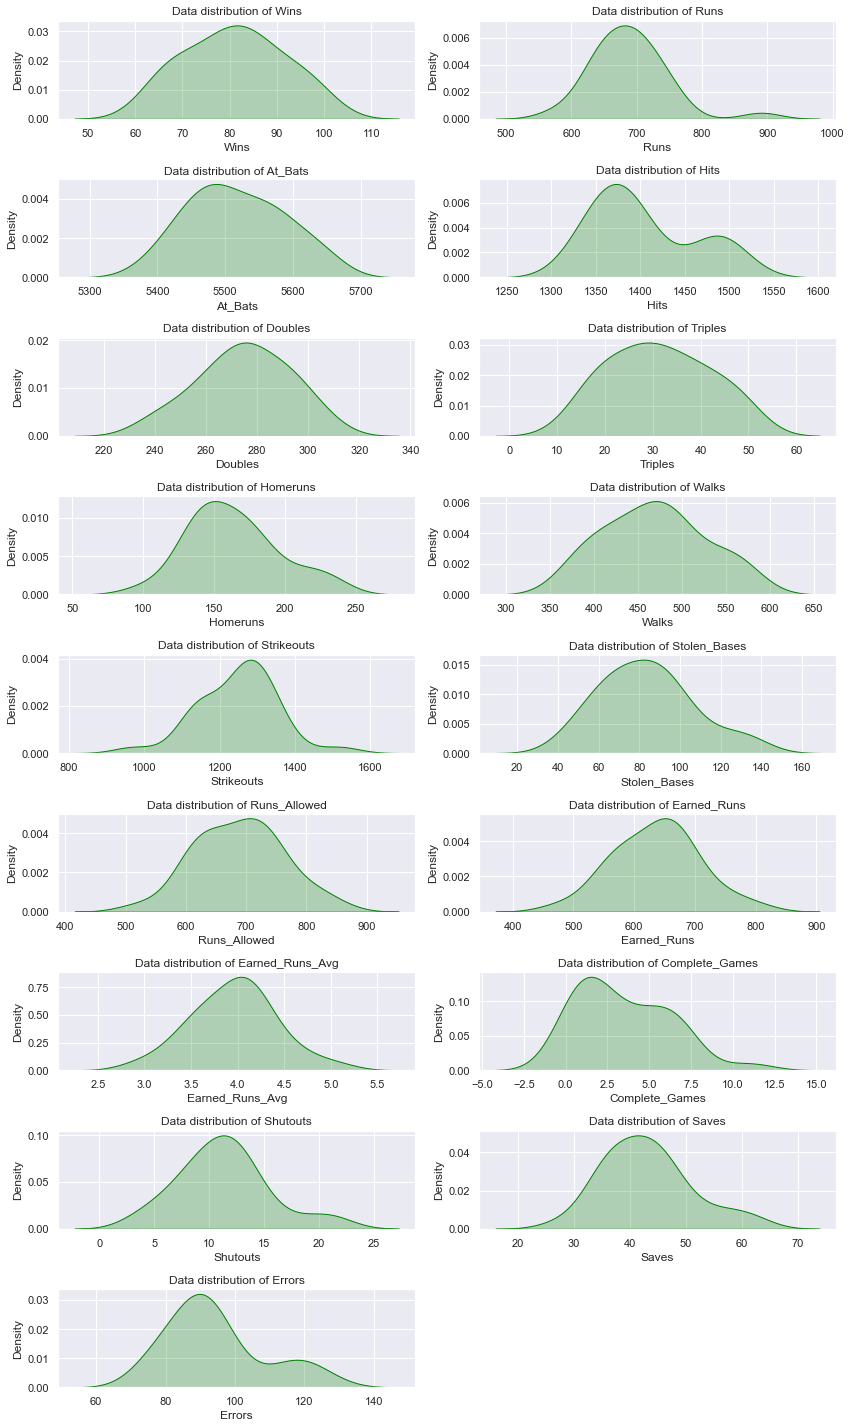

In [13]:
#Multivariate Analysis
#Visualising Data distribution of our dataset
plt.figure(figsize = (12,20), facecolor ='white')
plotnumber=1

for column in baseball:
    if plotnumber<=17: 
        ax = plt.subplot(9,2,plotnumber)
        sns.kdeplot(baseball[column], shade=True, color = 'green')
        plt.title('Data distribution of ' + column)
    plotnumber+=1
plt.tight_layout()

It seems like we've skewness in Runs,Hits,Saves and Errors.

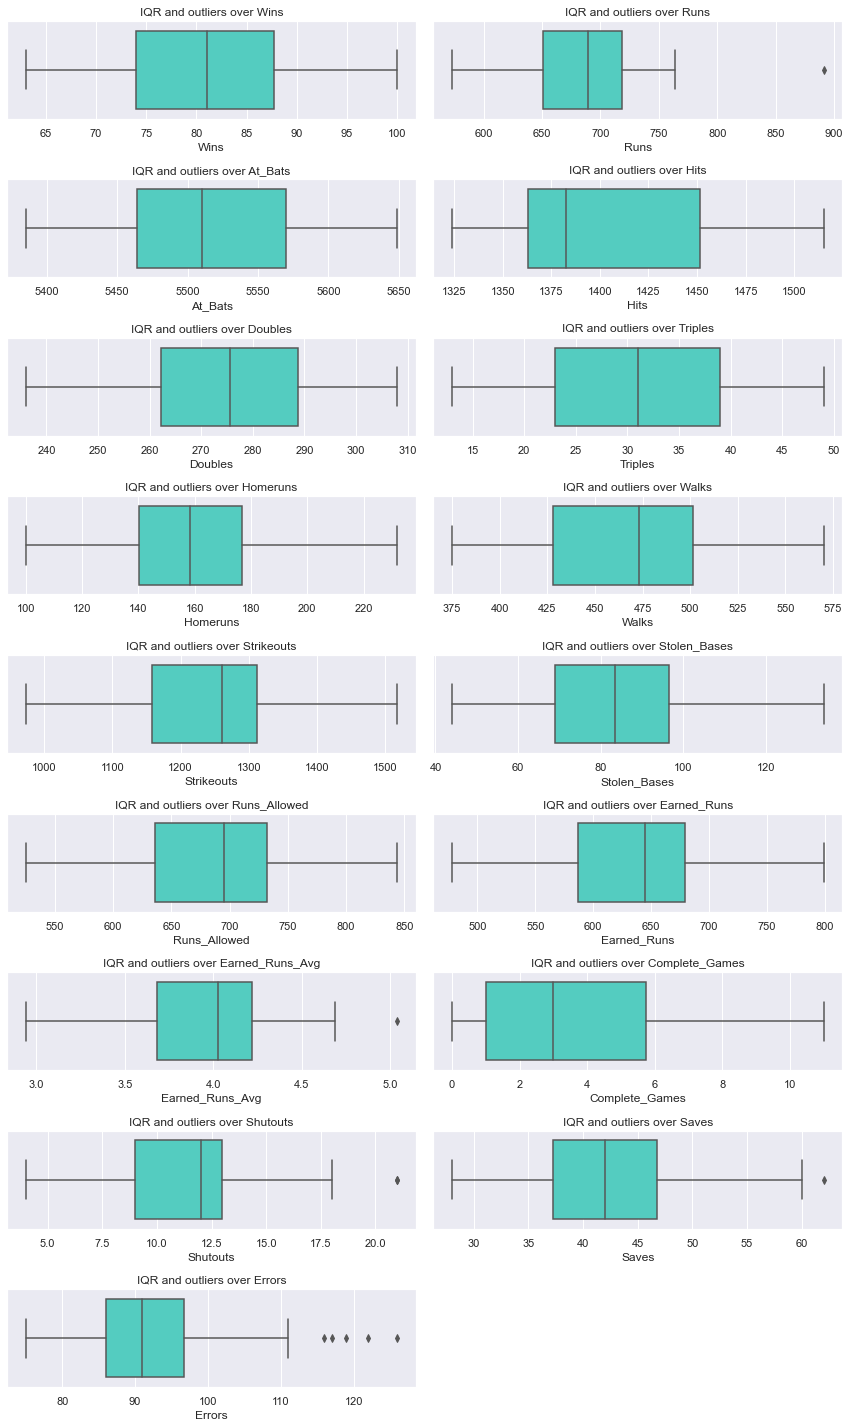

In [14]:
#Multivariate Analysis
#Visualising outliers in our Dataset
plt.figure(figsize = (12,20), facecolor ='white')
plotnumber=1

for column in baseball:
    if plotnumber<=17: 
        ax = plt.subplot(9,2,plotnumber)
        sns.boxplot(baseball[column], color = 'turquoise' )
        plt.title('IQR and outliers over ' + column)
    plotnumber+=1
plt.tight_layout()

There are outliers present in Errors.

# Bivariate Analysis

<AxesSubplot:xlabel='Runs', ylabel='Wins'>

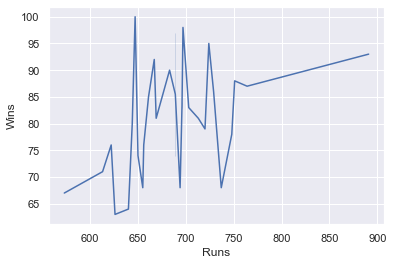

In [17]:
sns.lineplot(data=baseball, x = 'Runs', y = 'Wins')

<AxesSubplot:xlabel='Homeruns', ylabel='Wins'>

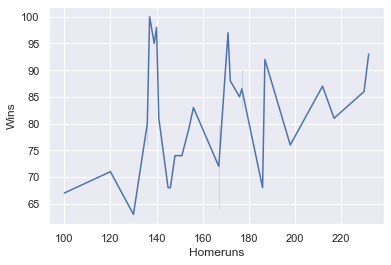

In [18]:
sns.lineplot(data=baseball, x = 'Homeruns', y = 'Wins')

<AxesSubplot:xlabel='Earned_Runs', ylabel='Wins'>

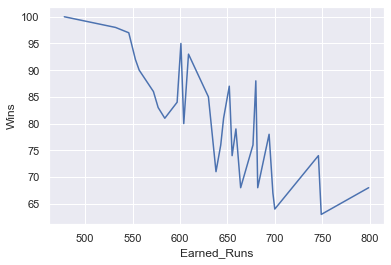

In [20]:
sns.lineplot(data=baseball, x = 'Earned_Runs', y = 'Wins')

<AxesSubplot:xlabel='Earned_Runs_Avg', ylabel='Wins'>

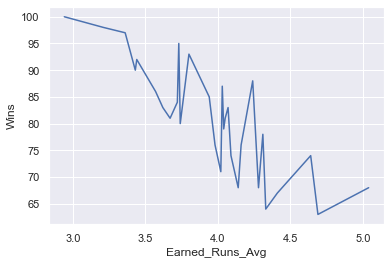

In [21]:
sns.lineplot(data=baseball, x = 'Earned_Runs_Avg', y = 'Wins')

<AxesSubplot:xlabel='Runs_Allowed', ylabel='Wins'>

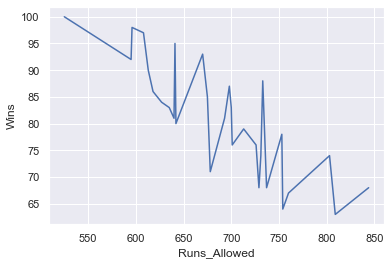

In [22]:
sns.lineplot(data = baseball, x = 'Runs_Allowed', y = 'Wins')

<AxesSubplot:xlabel='Errors', ylabel='Wins'>

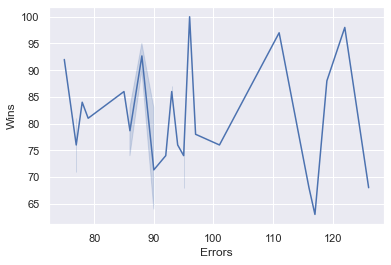

In [23]:
sns.lineplot(data=baseball, x = 'Errors', y = 'Wins')

<AxesSubplot:xlabel='Shutouts', ylabel='Wins'>

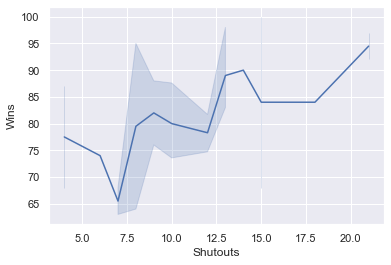

In [24]:
sns.lineplot(data=baseball, x = 'Shutouts', y = 'Wins')

Data Cleaning

In [25]:
#Checking for skewness in our Dataset
baseball.skew()

Wins               0.047089
Runs               1.200786
At_Bats            0.183437
Hits               0.670254
Doubles           -0.230650
Triples            0.129502
Homeruns           0.516441
Walks              0.158498
Strikeouts        -0.156065
Stolen_Bases       0.479893
Runs_Allowed       0.045734
Earned_Runs        0.058710
Earned_Runs_Avg    0.053331
Complete_Games     0.736845
Shutouts           0.565790
Saves              0.657524
Errors             0.890132
dtype: float64

In [26]:
#Removing skewness using log transformation
baseball['Runs'] = np.log(baseball['Runs'])
baseball['Runs'].skew()

0.7441956366104983

<AxesSubplot:xlabel='Runs', ylabel='Density'>

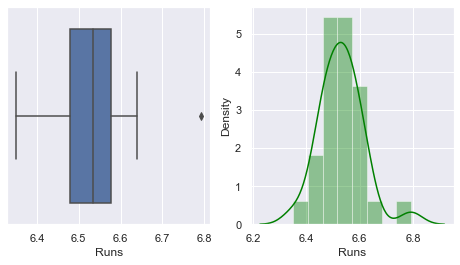

In [27]:
#Visualising data distribution after skewness removal
fig, ax = plt.subplots(1,2,figsize = (8,4))
sns.boxplot(baseball['Runs'], ax = ax[0])
sns.distplot(baseball['Runs'],color = 'green', ax = ax[1])

In [28]:
#Removing skewness using log transformation
baseball['Errors'] = np.log(baseball['Errors'])
baseball['Errors'].skew()

0.6300804690891397

<AxesSubplot:xlabel='Errors', ylabel='Density'>

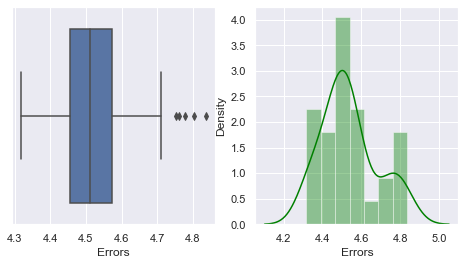

In [29]:
#Visualising data distribution after skewness removal
fig, ax = plt.subplots(1,2,figsize = (8,4))
sns.boxplot(baseball['Errors'], ax = ax[0])
sns.distplot(baseball['Errors'],color = 'green', ax = ax[1])

In [30]:
#Removing skewness using square-root transformation

baseball['Complete_Games'] = np.sqrt(baseball['Complete_Games'])
baseball['Complete_Games'].skew()
-0.3114761683268212

-0.3114761683268212

<AxesSubplot:xlabel='Complete_Games', ylabel='Density'>

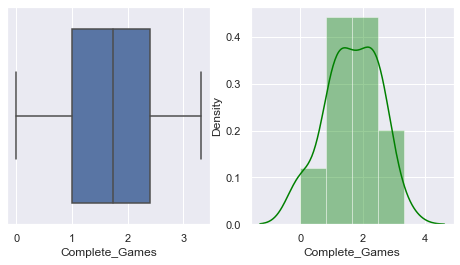

In [31]:
#Visualising data distribution after skewness removal
fig, ax = plt.subplots(1,2,figsize = (8,4))
sns.boxplot(baseball['Complete_Games'], ax = ax[0])
sns.distplot(baseball['Complete_Games'],color = 'green', ax = ax[1])

In [32]:
#Removing skewness using log transformation
baseball['Saves'] = np.log(baseball['Saves'])
baseball['Saves'].skew()

0.15058249970623516

<AxesSubplot:xlabel='Saves', ylabel='Density'>

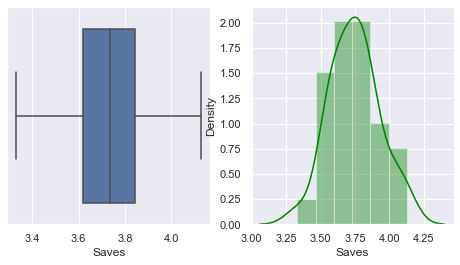

In [33]:
#Visualising data distribution after skewness removal
fig, ax = plt.subplots(1,2,figsize = (8,4))
sns.boxplot(baseball['Saves'], ax = ax[0])
sns.distplot(baseball['Saves'],color = 'green', ax = ax[1])

# Model Building

In [34]:
#Splitting Dataset into predictors and target
X = baseball.drop(columns = 'Wins', axis = 1)
y = baseball['Wins']

In [35]:
#Sclain our independent variable
Scaler = StandardScaler()
X_Scaled = Scaler.fit_transform(X)

In [36]:
#Splitting Dataset into training and testing set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25)

# Linear Regression Model

In [37]:
#Model instantiating and fitting
lm = LinearRegression()

lm.fit(X_train,y_train)

LinearRegression()

In [39]:
#Printing model confidence on training set and testing set
print("Linear Regression Model Confidence on training set : ",round(lm.score(X_train,y_train)*100,2),'%')
print("Linear Regression Model Confidence on testing set : ",round(lm.score(X_test,y_test)*100,2),'%')

Linear Regression Model Confidence on training set :  99.08 %
Linear Regression Model Confidence on testing set :  36.02 %


In [40]:
#Performing Model Predictions on X_test
y_pred = lm.predict(X_test)

In [41]:
#printing Intercept and weights our Linear Regression Model
print("Intercept for Linear Regression Model is : ",lm.intercept_,'\n')
weights = zip(X.columns,lm.coef_)
weights = pd.DataFrame(list(weights), columns = ['features', 'coefficients'])
print("Features and their corresponding weights:")
weights

Intercept for Linear Regression Model is :  -601.4101258086091 

Features and their corresponding weights:


,features,coefficients
0,Runs,122.337077
1,At_Bats,-0.023534
2,Hits,0.058474
3,Doubles,-0.272070
4,Triples,-0.042907
5,Homeruns,-0.156140
6,Walks,-0.044701
7,Strikeouts,0.020158
8,Stolen_Bases,-0.071715
9,Runs_Allowed,0.007192


In [42]:
#Applying Evaluation metrics to our Regression model
print('R squared for our Linear Regression Model:', r2_score(y_test,y_pred))
print('Mean Absolute Error for our Linear Regression Model:',mean_absolute_error(y_test,y_pred))
print('Mean Squared Error for our Linear Regression Model:',mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error for our Linear Regression Model:',np.sqrt(mean_squared_error(y_test,y_pred)))

R squared for our Linear Regression Model: 0.3602321800076096
Mean Absolute Error for our Linear Regression Model: 6.605807114872519
Mean Squared Error for our Linear Regression Model: 50.34173033565122
Root Mean Squared Error for our Linear Regression Model: 7.095190648294887


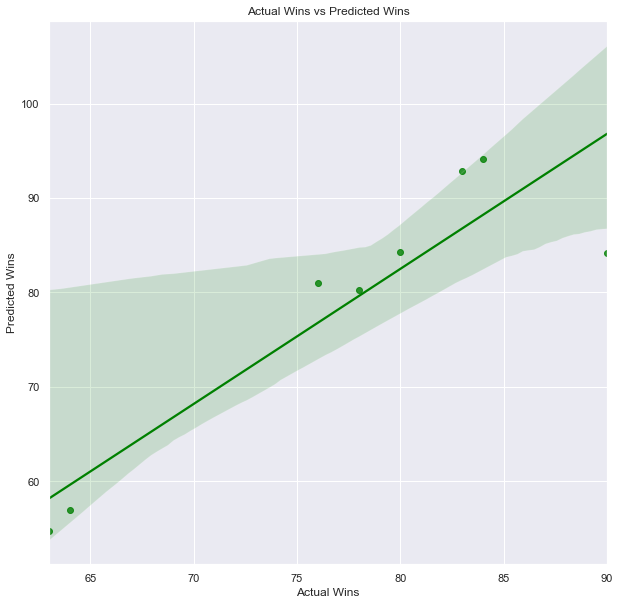

In [43]:
plt.figure(figsize = (10,10))
sns.regplot(x=y_test,y=y_pred,data=X_Scaled, color = 'green')
plt.xlabel('Actual Wins')
plt.ylabel('Predicted Wins')
plt.title('Actual Wins vs Predicted Wins')
plt.show()

In [44]:
#Performing OLS model on all 

OLS = smf.ols(formula = 'y~ X',data = baseball).fit()
OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     15.91
Date:                Sun, 10 Apr 2022   Prob (F-statistic):           5.25e-06
Time:                        11:29:50   Log-Likelihood:                -67.098
No. Observations:                  30   AIC:                             168.2
Df Residuals:                      13   BIC:                             192.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -326.7557    194.985     -1.676      0.118    -747.995      94.483
X[0]          83.3948     25.578      3.260      0.006      28.138     138.652
X[1]          -0.0334      0.032     -1.039      0.318      -0.103       0.036
X[2]           0.0244      0.032      0.752      0.465      -0.046       0.094
X[3]          -0.1095      0.071     -1.545      0.146      -0.263       0.044
X[4]           0.0363      0.113      0.321      0.753      -0.208       0.281
X[5]          -0.0438      0.065     -0.672      0.513      -0.185       0.097
X[6]          -0.0242      0.022     -1.093      0.294      -0.072       0.024
X[7]          -0.0015      0.010     -0.151      0.882      -0.024       0.021
X[8]          -0.0201      0.039     -0.509      0.620      -0.105       0.065
X[9]           0.1011      0.124      0.817      0.429      -0.166       0.369
X[10]          0.1705      0.382      0.447      0.662      -0.654       0.995
X[11]        -55.4881     49.822     -1.114      0.286    -163.123      52.147
X[12]          2.1312      1.238      1.722      0.109      -0.543       4.805
X[13]          0.2285      0.294      0.777      0.451      -0.407       0.864
X[14]         25.6117      7.689      3.331      0.005       9.000      42.223
X[15]          0.7503      6.585      0.114      0.911     -13.475      14.976
==============================================================================
Omnibus:                        3.384   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.184   Jarque-Bera (JB):                2.792
Skew:                          -0.742   Prob(JB):                        0.248
Kurtosis:                       2.818   Cond. No.                     1.87e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.87e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Performing Feature Selection to achieve better performance

In [45]:
#pearson's correlation feature selection for numeric input and numeric output

# define feature selection
fs = SelectKBest(score_func=f_regression, k=11)
# apply feature selection
X_selected = fs.fit_transform(X_Scaled, y)

df_scores = pd.DataFrame(fs.scores_)
df_columns = pd.DataFrame(X.columns)

#concatenate dataframes
feature_scores = pd.concat([df_columns,df_scores], axis=1)
feature_scores.columns = ['Feature_Name', 'Score']

#Sorting in Descending order
print(feature_scores.nlargest(11,'Score'))

       Feature_Name      Score
11  Earned_Runs_Avg  57.299198
9      Runs_Allowed  54.569271
10      Earned_Runs  53.202874
14            Saves  22.557243
6             Walks   8.581552
13         Shutouts   8.017499
0              Runs   6.829909
3           Doubles   6.272152
5          Homeruns   2.922118
4           Triples   1.884521
8      Stolen_Bases   0.709779


In [46]:
X_train,X_test,y_train,y_test= train_test_split(X_selected,y,test_size = 0.2)

In [47]:
lm.fit(X_train,y_train)
lm.score(X_test,y_test)

0.8128787746828628

In [48]:
y_pred = lm.predict(X_test)

In [49]:
r2_score(y_test,y_pred)

0.8128787746828628

In [50]:
#Printing model confidence on training set and testing set
print("Linear Regression Model Confidence on training set : ",round(lm.score(X_train,y_train)*100,2),'%')
print("Linear Regression Model Confidence on testing set : ",round(lm.score(X_test,y_test)*100,2),'%')

Linear Regression Model Confidence on training set :  93.11 %
Linear Regression Model Confidence on testing set :  81.29 %


In [51]:
#Applying Evaluation metrics to our Regression model
print('R squared for our Linear Regression Model:', r2_score(y_test,y_pred))
print('Mean Absolute Error for our Linear Regression Model:',mean_absolute_error(y_test,y_pred))
print('Mean Squared Error for our Linear Regression Model:',mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error for our Linear Regression Model:',np.sqrt(mean_squared_error(y_test,y_pred)))

R squared for our Linear Regression Model: 0.8128787746828628
Mean Absolute Error for our Linear Regression Model: 4.116586265639551
Mean Squared Error for our Linear Regression Model: 24.227000866754892
Root Mean Squared Error for our Linear Regression Model: 4.922093138772863


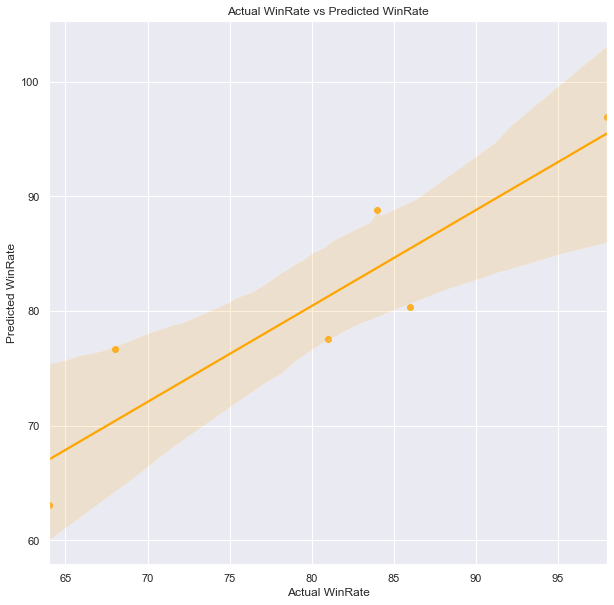

In [52]:
plt.figure(figsize = (10,10))
sns.regplot(x=y_test,y=y_pred,data=X_Scaled, color = 'orange')
plt.xlabel('Actual WinRate')
plt.ylabel('Predicted WinRate')
plt.title('Actual WinRate vs Predicted WinRate')
plt.show()

# Regularization using Ridge

In [53]:
#Ridge will return best alpha and coefficients after performing 10 cross validations
ridgecv = RidgeCV(alphas= np.arange(0.001,0.2,0.001),normalize=True)
ridgecv.fit(X_train,y_train)

RidgeCV(alphas=array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009,
       0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018,
       0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027,
       0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035, 0.036,
       0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044, 0.045,
       0.046, 0.047, 0.048, 0.049, 0.05 , 0.051, 0.052, 0.053, 0.054,
       0.055, 0.0...
       0.136, 0.137, 0.138, 0.139, 0.14 , 0.141, 0.142, 0.143, 0.144,
       0.145, 0.146, 0.147, 0.148, 0.149, 0.15 , 0.151, 0.152, 0.153,
       0.154, 0.155, 0.156, 0.157, 0.158, 0.159, 0.16 , 0.161, 0.162,
       0.163, 0.164, 0.165, 0.166, 0.167, 0.168, 0.169, 0.17 , 0.171,
       0.172, 0.173, 0.174, 0.175, 0.176, 0.177, 0.178, 0.179, 0.18 ,
       0.181, 0.182, 0.183, 0.184, 0.185, 0.186, 0.187, 0.188, 0.189,
       0.19 , 0.191, 0.192, 0.193, 0.194, 0.195, 0.196, 0.197, 0.198,
       0.199]),
        normalize=True)

In [54]:
ridgecv.alpha_

0.039

In [55]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(X_train,y_train)

Ridge(alpha=0.039)

In [56]:
ridge_model.score(X_test,y_test)

0.8386302526436212

In [57]:
ridgepred = ridge_model.predict(X_test)

In [58]:
#Applying Evaluation metrics to our Tuned Lasso Regression model
print('R2 Score for Tuned Ridge Regression Model:', r2_score(y_test,ridgepred))
print('Mean Absolute Error for our Tuned Ridge Regression Model:',mean_absolute_error(y_test,ridgepred))
print('Mean Squared Error for our Tuned Ridge Regression Model:',mean_squared_error(y_test,ridgepred))
print('Root Mean Squared Error for our Ridge Linear Regression Model:',np.sqrt(mean_squared_error(y_test,ridgepred)))

R2 Score for Tuned Ridge Regression Model: 0.8386302526436212
Mean Absolute Error for our Tuned Ridge Regression Model: 3.8574995090063973
Mean Squared Error for our Tuned Ridge Regression Model: 20.892899789668924
Root Mean Squared Error for our Ridge Linear Regression Model: 4.570875166712489


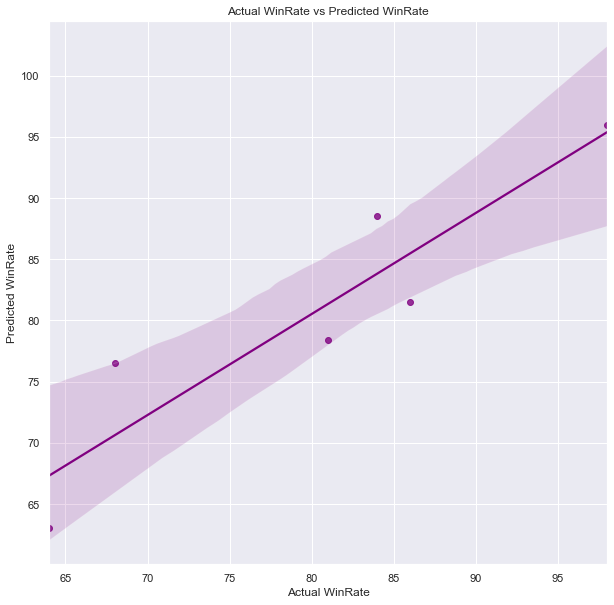

In [59]:
#Plotting Regression Line
plt.figure(figsize = (10,10))
sns.regplot(x=y_test,y=ridgepred,data=X, color = 'purple')
plt.xlabel('Actual WinRate')
plt.ylabel('Predicted WinRate')
plt.title('Actual WinRate vs Predicted WinRate')
plt.show()

# Regularization using Lasso

In [60]:
#LassoCV(lasso cross validation) will return the best alpha after max iterations
#normalizing is subtracting the mean and dividing by l2-norm
lasscv = LassoCV(alphas=None, max_iter=2000, normalize = True)
lasscv.fit(X_train,y_train)
alpha = lasscv.alpha_
alpha

0.06295153522221231

In [61]:
#Now that we have best parameter, let's use lasso regression and see how well our data has fitted before
alpha = lasscv.alpha_

lasso_reg = Lasso(alpha)
lasso_reg.fit(X_train,y_train)

Lasso(alpha=0.06295153522221231)

In [62]:
#Model Confidence After using Lasso Regression
print('Model Confidence After using Lasso Regularization Model: ',round(lasso_reg.score(X_test,y_test),3)*100, '%')

Model Confidence After using Lasso Regularization Model:  87.9 %


In [63]:
lassopred = lasso_reg.predict(X_test)

In [64]:
#Applying Evaluation metrics to our Tuned Lasso Regression model
print('R2 Score for Tuned Lasso Regression Model:', r2_score(y_test,lassopred))
print('Mean Absolute Error for our Tuned Lasso Regression Model:',mean_absolute_error(y_test,lassopred))
print('Mean Squared Error for our Tuned Lasso Regression Model:',mean_squared_error(y_test,lassopred))
print('Root Mean Squared Error for our Lasso Linear Regression Model:',np.sqrt(mean_squared_error(y_test,lassopred)))

R2 Score for Tuned Lasso Regression Model: 0.8790811053213686
Mean Absolute Error for our Tuned Lasso Regression Model: 3.114414731934886
Mean Squared Error for our Tuned Lasso Regression Model: 15.65563800269724
Root Mean Squared Error for our Lasso Linear Regression Model: 3.956720612160687


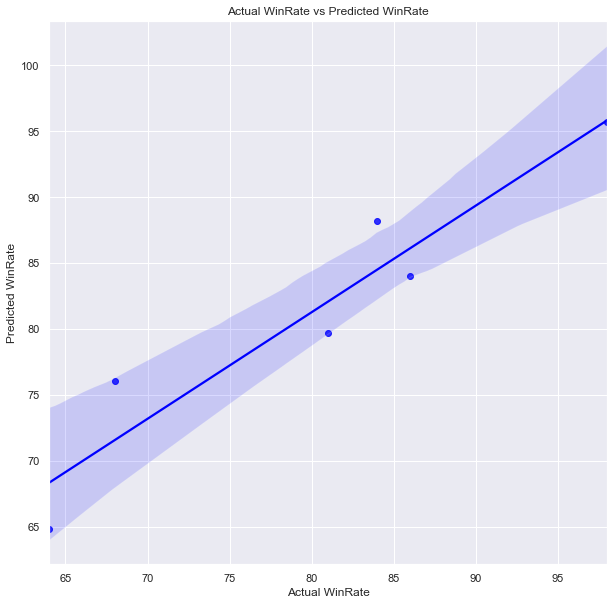

In [65]:
plt.figure(figsize = (10,10))
sns.regplot(x=y_test,y=lassopred,data=X_selected, color = 'blue')
plt.xlabel('Actual WinRate')
plt.ylabel('Predicted WinRate')
plt.title('Actual WinRate vs Predicted WinRate')
plt.show()

# Decision Tree Regressor

In [66]:
#Instantiating model
dt = DecisionTreeRegressor()

In [67]:
#Fitting model
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [68]:
#predicting X_test
y_pred = dt.predict(X_test)

In [69]:
#Applying Evaluation metrics to our Decision Tree Regressor model
print('R2 Score for Decision Tree Regressor:', r2_score(y_test,y_pred))
print('Mean Absolute Error for our Decision Tree Regressor Model:',mean_absolute_error(y_test,y_pred))
print('Mean Squared Error for our Decision Tree Regressor Model:',mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error for our Decision Tree Regressor Model:',np.sqrt(mean_squared_error(y_test,y_pred)))

R2 Score for Decision Tree Regressor: 0.5636129585925767
Mean Absolute Error for our Decision Tree Regressor Model: 6.166666666666667
Mean Squared Error for our Decision Tree Regressor Model: 56.5
Root Mean Squared Error for our Decision Tree Regressor Model: 7.516648189186454


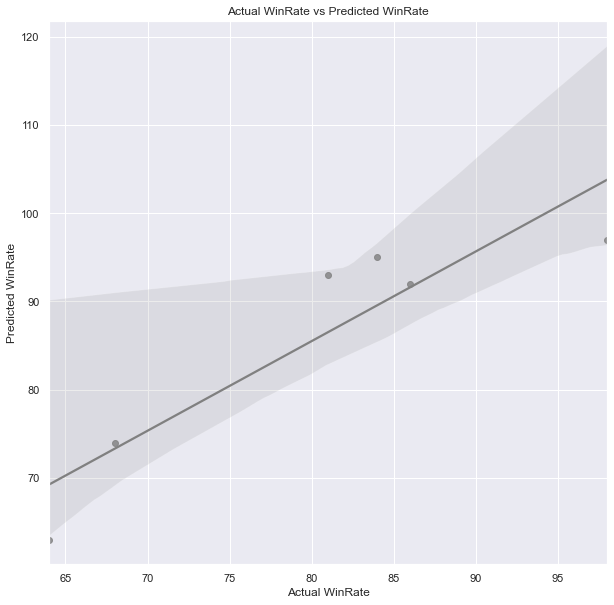

In [70]:
plt.figure(figsize = (10,10))
sns.regplot(x=y_test,y=y_pred,data=X, color = 'grey')
plt.xlabel('Actual WinRate')
plt.ylabel('Predicted WinRate')
plt.title('Actual WinRate vs Predicted WinRate')
plt.show()

# K Nearest Neighbor

In [72]:
#Model Instantiating
knn = KNeighborsRegressor(n_neighbors = 9)

In [73]:
#Model Fitting
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=9)

In [74]:
knnpred  = knn.predict(X_test)

In [75]:
#Applying Evaluation metrics to our KNN Regression model
print('R2 Score for KNN Regression Model:', r2_score(y_test,knnpred))
print('Mean Absolute Error for our KNN Regression Model:',mean_absolute_error(y_test,knnpred))
print('Mean Squared Error for our KNN Regression Model:',mean_squared_error(y_test,knnpred))
print('Root Mean Squared Error for our KNN Regression Model:',np.sqrt(mean_squared_error(y_test,knnpred)))

R2 Score for KNN Regression Model: 0.6617003186408894
Mean Absolute Error for our KNN Regression Model: 5.203703703703702
Mean Squared Error for our KNN Regression Model: 43.80041152263374
Root Mean Squared Error for our KNN Regression Model: 6.6181879334628855


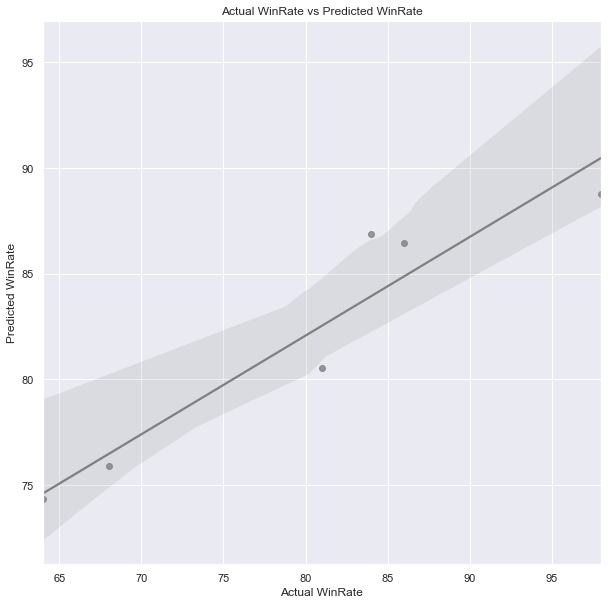

In [76]:
plt.figure(figsize = (10,10))
sns.regplot(x=y_test,y=knnpred,data=X, color = 'grey')
plt.xlabel('Actual WinRate')
plt.ylabel('Predicted WinRate')
plt.title('Actual WinRate vs Predicted WinRate')
plt.show()


# Boosting using Gradient Boosting Regressor

In [77]:
gradient = GradientBoostingRegressor()

In [78]:
gradient.fit(X_train,y_train)

GradientBoostingRegressor()

In [79]:
grpred = gradient.predict(X_test)

In [80]:
#Applying Evaluation metrics to our Gradient Boostin Regresser model
print('R2 Score for Gradient Boostin Regresser Model:', r2_score(y_test,grpred))
print('Mean Absolute Error for our Gradient Boostin Regresser Model:',mean_absolute_error(y_test,grpred))
print('Mean Squared Error for our Gradient Boostin Regresser Model:',mean_squared_error(y_test,grpred))
print('Root Mean Squared Error for our Gradient Boostin Regresser Model:',np.sqrt(mean_squared_error(y_test,grpred)))

R2 Score for Gradient Boostin Regresser Model: 0.7008383460418486
Mean Absolute Error for our Gradient Boostin Regresser Model: 5.506414757544735
Mean Squared Error for our Gradient Boostin Regresser Model: 38.73312414163732
Root Mean Squared Error for our Gradient Boostin Regresser Model: 6.223594149817075


# Random Forest Regressor

In [81]:
rf = RandomForestRegressor()

In [82]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [83]:
rfpred = rf.predict(X_test)

In [84]:
#Applying Evaluation metrics to our KNN Regression model
print('R2 Score for Random Forest Regressor Model:', r2_score(y_test,rfpred))
print('Mean Absolute Error for our KNN Regression Model:',mean_absolute_error(y_test,rfpred))
print('Mean Squared Error for our KNN Regression Model:',mean_squared_error(y_test,rfpred))
print('Root Mean Squared Error for our KNN Regression Model:',np.sqrt(mean_squared_error(y_test,rfpred)))

R2 Score for Random Forest Regressor Model: 0.6298447972538082
Mean Absolute Error for our KNN Regression Model: 5.881666666666668
Mean Squared Error for our KNN Regression Model: 47.92481666666666
Root Mean Squared Error for our KNN Regression Model: 6.922775214223459


# Hyper Parameter Tuning of Best Model

In [85]:
#Using Randomized Search
param_grid = {'alpha': uniform()}

model = Lasso()
rand_search = RandomizedSearchCV(estimator=model, 
                            param_distributions=param_grid,
                                 n_iter=100)

rand_search.fit(X_train,y_train)

print(rand_search.best_estimator_.alpha)
print(rand_search.best_score_)

0.2742592734377791
0.721271487501485


In [86]:
pred = rand_search.predict(X_test)

In [87]:
#Applying Evaluation metrics to our Tuned Lasso Regression model
print('R2 Score for Tuned Lasso Regression Model:', r2_score(y_test,pred))
print('Mean Absolute Error for our Tuned Lasso Regression Model:',mean_absolute_error(y_test,pred))
print('Mean Squared Error for our Tuned Lasso Regression Model:',mean_squared_error(y_test,pred))
print('Root Mean Squared Error for our Lasso Linear Regression Model:',np.sqrt(mean_squared_error(y_test,pred)))

R2 Score for Tuned Lasso Regression Model: 0.8654114797086003
Mean Absolute Error for our Tuned Lasso Regression Model: 3.6713989285926565
Mean Squared Error for our Tuned Lasso Regression Model: 17.425474807728154
Root Mean Squared Error for our Lasso Linear Regression Model: 4.174383164939241


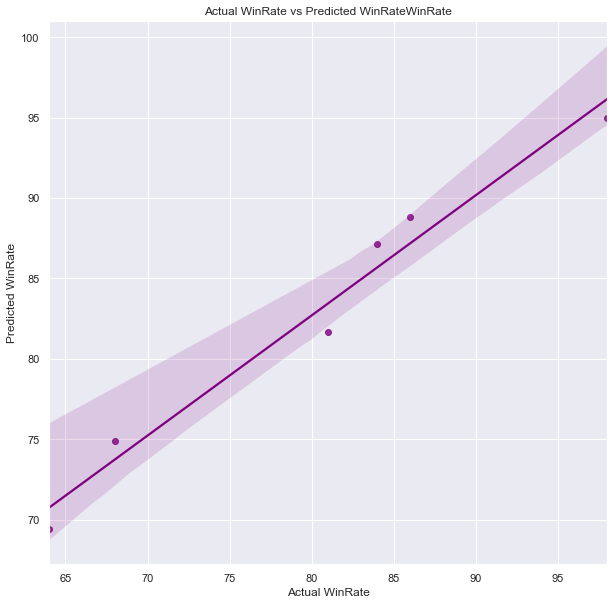

In [88]:
plt.figure(figsize = (10,10))
sns.regplot(x=y_test,y=pred,data=X, color = 'purple')
plt.xlabel('Actual WinRate')
plt.ylabel('Predicted WinRate')
plt.title('Actual WinRate vs Predicted WinRateWinRate')
plt.show()

Conclusion : our Lasso Regression Model is giving us the best r2_score(0.89), MSE(2.63896) and MAE(9.0775) among all the other models that we've tried so far.

Saving Our Final Model

In [90]:
joblib.dump(lasso_reg,"Baseballcasestudy.pkl")

['Baseballcasestudy.pkl']

 Loading our Saved model

In [91]:
model = joblib.load("Baseballcasestudy.pkl")

In [92]:
#predicting test data using loaded model
prediction = model.predict(X_test)
prediction

array([88.18609481, 83.9846855 , 79.70096853, 76.03826015, 64.83445008,
       95.68666261])

In [93]:
#Analysing Predicted vs Actual
results = pd.DataFrame()
results['Predicted'] = prediction
results['Actual'] = y
results

,Predicted,Actual
0,88.186095,95
1,83.984685,83
2,79.700969,81
3,76.038260,76
4,64.834450,74
5,95.686663,93


In [94]:
#Converting the saved file into .csv format
results.to_csv('Results.csv',index = True)